<a href="https://colab.research.google.com/github/Tony-Y/oqmd-v1.2-dataset-for-cgnn/blob/main/CGNN_oqmd_fe_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c0d55056-d835-4bc2-19f1-c976d2b52300)


In [2]:
!pip list | grep torch

torch                         1.12.1+cu113
torchaudio                    0.12.1+cu113
torchsummary                  1.5.1
torchtext                     0.13.1
torchvision                   0.13.1+cu113


# Clone CGNN

In [3]:
!git clone https://github.com/Tony-Y/cgnn.git

Cloning into 'cgnn'...
remote: Enumerating objects: 267, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 267 (delta 66), reused 77 (delta 31), pack-reused 136
Receiving objects: 100% (267/267), 2.04 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (91/91), done.


# Download the OQMD v1.2 Dataset

In [4]:
!wget -q "https://zenodo.org/record/7118055/files/oqmd-v1_2-for-cgnn.7z?download=1" -O oqmd.7z

In [5]:
!7z e oqmd.7z -ocgnn/OQMD *.npz *.json *.csv -r


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 74747342 bytes (72 MiB)

Extracting archive: oqmd.7z
--
Path = oqmd.7z
Type = 7z
Physical Size = 74747342
Headers Size = 363
Method = LZMA2:24
Solid = +
Blocks = 4

  0%      5% - oqmd_dataset/targets.csv                                11% - oqmd_dataset/targets.csv                                18% - oqmd_dataset/targets.csv                                24% - oqmd_dataset/targets.csv                                32% - oqmd_dataset/targets.csv

In [6]:
!ls cgnn/OQMD/

config.json  graph_data.npz  oqmd.py  README.md  split.json  targets.csv


# Train a CGNN Model

In [7]:
%pushd 'cgnn/examples/oqmd_fe_benchmark/'

/content/cgnn/examples/oqmd_fe_benchmark


['/content']

In [9]:
!bash run_oqmd.sh | tee log.txt

Device: cuda

Model: {'n_node_feat': 89, 'n_hidden_feat': 96, 'n_graph_feat': 192, 'n_conv': 4, 'n_fc': 2, 'activation': 'softplus', 'use_batch_norm': True, 'node_activation': None, 'use_node_batch_norm': False, 'edge_activation': None, 'use_edge_batch_norm': False, 'n_edge_net_feat': 16, 'n_edge_net_layers': 0, 'edge_net_activation': 'elu', 'use_edge_net_batch_norm': False, 'use_fast_edge_network': False, 'fast_edge_network_type': 0, 'use_aggregated_edge_network': False, 'edge_net_cardinality': 32, 'edge_net_width': 4, 'use_edge_net_shortcut': False, 'n_postconv_net_layers': 0, 'postconv_net_activation': 'elu', 'use_postconv_net_batch_norm': False, 'conv_bias': False, 'edge_net_bias': False, 'postconv_net_bias': False, 'full_pooling': True, 'gated_pooling': True, 'conv_type': 0, 'use_extension': False}

Optimizer: {'optim': 'adam', 'lr': 0.001, 'weight_decay': 1e-06, 'clip_value': None}

Scheduler: {'milestones': [250], 'gamma': 0.1, 'cosine_annealing': False}

Dataset: {'dataset_path

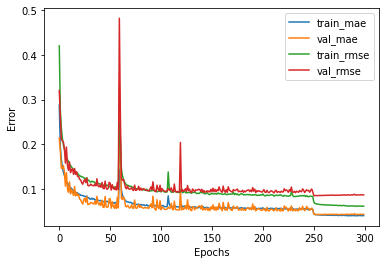

<Figure size 432x288 with 0 Axes>

In [10]:
%run '../../tools/plot_history.py'

RMSE: 0.08554630306230702
MAE: 0.04247535157433487
max_value 4.1542673
min_value -4.444026


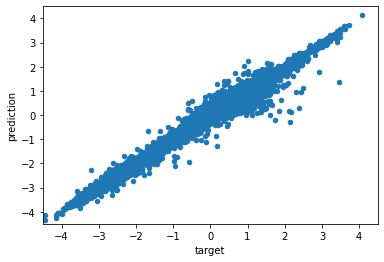

<Figure size 432x288 with 0 Axes>

In [11]:
%run '../../tools/plot_test.py'

In [12]:
%popd

/content
popd -> /content


In [13]:
!cd cgnn/examples; zip -r oqmd_fe_benchmark.zip oqmd_fe_benchmark

  adding: oqmd_fe_benchmark/ (stored 0%)
  adding: oqmd_fe_benchmark/model.pth (deflated 14%)
  adding: oqmd_fe_benchmark/run_oqmd.sh (deflated 41%)
  adding: oqmd_fe_benchmark/history.csv (deflated 54%)
  adding: oqmd_fe_benchmark/test_predictions.csv (deflated 59%)
  adding: oqmd_fe_benchmark/log.txt (deflated 86%)
